<a href="https://colab.research.google.com/github/SergeyPishchulov/CurrencyConverter/blob/main/%D0%91%D0%A4_%D0%BF%D0%BE_%D1%82%D0%B8%D0%BF%D0%B0%D0%BC_%D0%A4%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
import numpy.random as rand
import random
import pylab
import math

In [80]:
EPSILON = 2.5 * 1e-3

def get_d_m0(a,b): return b**2+2*b-4*a+1
def get_d_m1(a,b): return a**2+6*a-8*b+1

def get_lambda_m0(a,b, d):
  l1=(b-1+cmath.sqrt(d))/2
  l2=(b-1-cmath.sqrt(d))/2 
  return l1,l2

def get_lambda_m1(a,b, d):
  l1=(a-1+cmath.sqrt(d))/2
  l2=(a-1-cmath.sqrt(d))/2 
  return l1,l2   

def get_color(a, b, get_d, get_lambda, epsilon=15 * 1e-3):
    if b<=a and get_lambda==get_lambda_m1:
      return 6
    d=get_d(a,b)
    l1, l2 = get_lambda(a,b, d)
    if d >= -epsilon:
      if l1.real > epsilon and l2.real>epsilon:
        return 0 # Неустойчивый узел
      if l1.real < -epsilon and l2.real < -epsilon:
        return 1 # Устойчивый узел 
      return 2 # Седло
    if abs(l1.real) < epsilon:
      return 3 # Центр
    if l1.real > 0:
      return 4 # Неустойчивый фокус
    return 5 # Устойчивый фокус

type_by_color={
    0: "Неустойчивый узел",
    1: "Устойчивый узел",
    2: "Седло",
    3: "Центр",
    4: "Неустойчивый фокус",
    5: "Устойчивый фокус",
    6: "-"
}

def get_portarit_type(c):
  if c==0:
    return "Неустойчивый узел"
  if c==1:
    return "Устойчивый узел"
  if c==2:
    return "Седло"
  if c==3:
    return "Центр"
  if c==4:
    return "Неустойчивый фокус"
  if c==5:
    return "Устойчивый фокус"
  if c==6:
    return None #Не существует

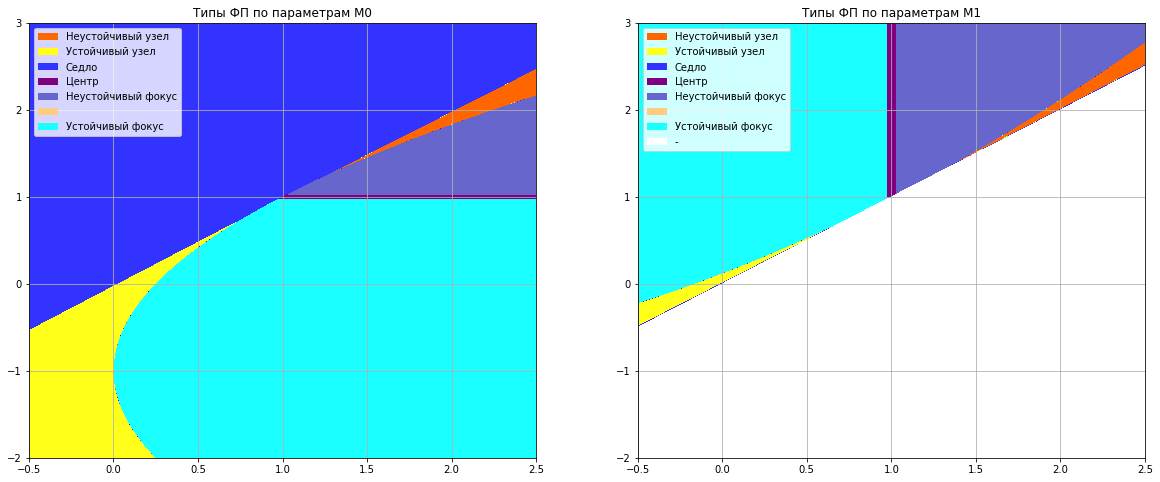

In [42]:
a_line=np.linspace(-0.5, 2.5, 3001)
b_line=np.linspace(-2, 3, 3001)
xx, yy = np.meshgrid(a_line, b_line)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(20) 
mycmap1 = plt.get_cmap('rainbow')

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

color_scheme=[(1, 0.4, 0),
              (1,1, 0.1),
              (0.2,0.2, 1),
              (0.5, 0., 0.5),
              (0.4, 0.4, 0.8),
              (1, 0.8, 0.5),
              (0.1, 1, 1),
              (1,1,1)
              ]


titles=["Неустойчивый узел", "Устойчивый узел", "Седло", "Центр", "Неустойчивый фокус", "", "Устойчивый фокус", "-"]

colors_m0 = np.vectorize(get_color)(xx, yy, get_d_m0, get_lambda_m0)
h1 = ax1.contourf(a_line, b_line, colors_m0, colors=color_scheme)
proxy = [plt.Rectangle((1, 1), 2, 2, fc=pc.get_facecolor()[0]) for pc in h1.collections]
ax1.set_title("Типы ФП по параметрам М0")
ax1.legend(proxy, titles,loc='upper left')
ax1.grid()

colors_m1 = np.vectorize(get_color)(xx, yy, get_d_m1, get_lambda_m1)
h2 = ax2.contourf(a_line, b_line, colors_m1, colors=color_scheme)
proxy = [plt.Rectangle((1, 1), 2, 2, fc=pc.get_facecolor()[0]) for pc in h2.collections]
ax2.set_title("Типы ФП по параметрам М1")
ax2.legend(proxy, titles, loc='upper left')
ax2.grid()

plt.show() 

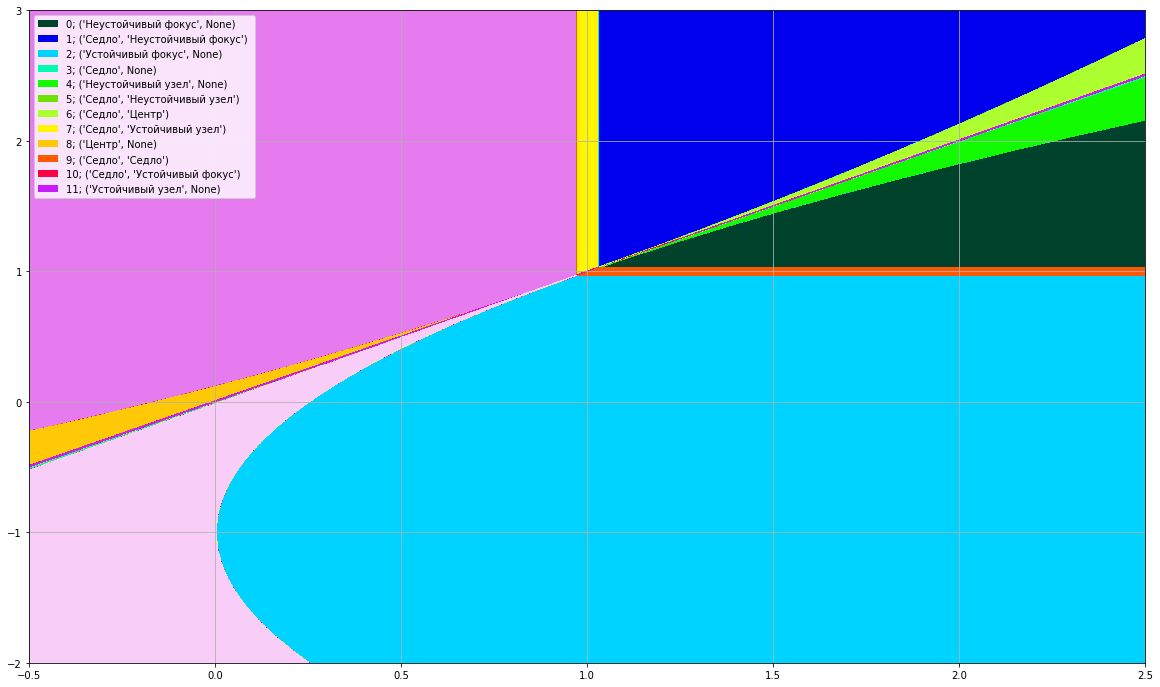

In [147]:
def get_color_by_parameters(a,b, eq_point):
  if eq_point=="m0":
    get_d, get_lambda =get_d_m0, get_lambda_m0
  if eq_point=="m1":
    get_d, get_lambda =get_d_m1, get_lambda_m1
  return get_color(a,b,get_d, get_lambda)

def get_portarit_type_by_parameters(a,b, eq_point):
  color=get_color_by_parameters(a,b, eq_point)  
  return get_portarit_type(color)
t=[('Неустойчивый фокус', None), ('Седло', 'Неустойчивый фокус'), ('Устойчивый фокус', None), ('Седло', None), ('Неустойчивый узел', None), ('Седло', 'Неустойчивый узел'), ('Седло', 'Центр'), ('Седло', 'Устойчивый узел'), ('Центр', None), ('Седло', 'Седло'), ('Седло', 'Устойчивый фокус'), ('Устойчивый узел', None)]

s=set()
levels=set()
def get_color_joint(a,b):
  type1, type2 = get_color_by_parameters(a,b,'m0'), get_color_by_parameters(a,b,'m1')
  t1=get_portarit_type_by_parameters(a,b,'m0')
  t2=get_portarit_type_by_parameters(a,b,'m1')
  res=t.index((t1,t2))
  levels.add(res)
  return res


a_line=np.linspace(-0.5, 2.5, 3001)
b_line=np.linspace(-2, 3, 2001)
xx, yy = np.meshgrid(a_line, b_line)
mycmap1 = plt.get_cmap('gist_ncar')
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(20) 
colors = np.vectorize(get_color_joint)(xx, yy)
levels=sorted(list(levels))
h=plt.contourf(a_line, b_line, colors,cmap=mycmap1, levels=13)
plt.grid()
proxy = [plt.Rectangle((1, 1), 2, 2, fc=pc.get_facecolor()[0]) for pc in h.collections]
titles=[f"{l}; {t[l]} " for l in levels]
plt.legend(proxy, titles,loc='upper left')

plt.show()

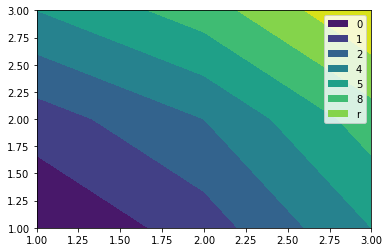

{2, 5, 8, 10, 13, 18}


6

In [132]:
import numpy as np
import matplotlib.pyplot as plt
x, y = np.meshgrid(np.arange(1,),np.arange(1,4))
z = np.round_(x**2 + y**2)
cs = plt.contourf(x,y,z)

proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in cs.collections]

plt.legend(proxy, ["0", "1", "2", "4",'5', '8', 'r'])
plt.show()
print(set(list(z.reshape(-1))))
len(set(list(z.reshape(-1))))

In [79]:
15//7

2